# Clustering

In this notebook, I will work with two clustering algorithms.
1. K Means Clustering
2. Hierarchical Clustering

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Using the last two columns from the dataset.

In [3]:
X = dataset.iloc[:, [3,4]]

## K Means Clustering

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters = i)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)

Text(0.5, 1.0, 'Elbow Method to detect CLusters')

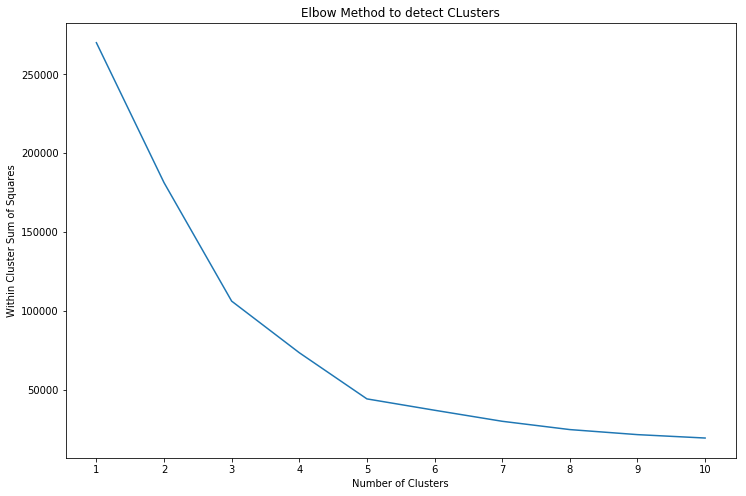

In [5]:
plt.figure(figsize = (12, 8))
plt.plot([i for i in range(1, 11)], wcss)
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Method to detect CLusters')

Taking a look at the elbow curve above, the elbow occurs at 5 clusters. Thus, I decided to take 5 as the numbers of clusters.

In [6]:
kMeans = KMeans(n_clusters = 5)
clusters = kMeans.fit_predict(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

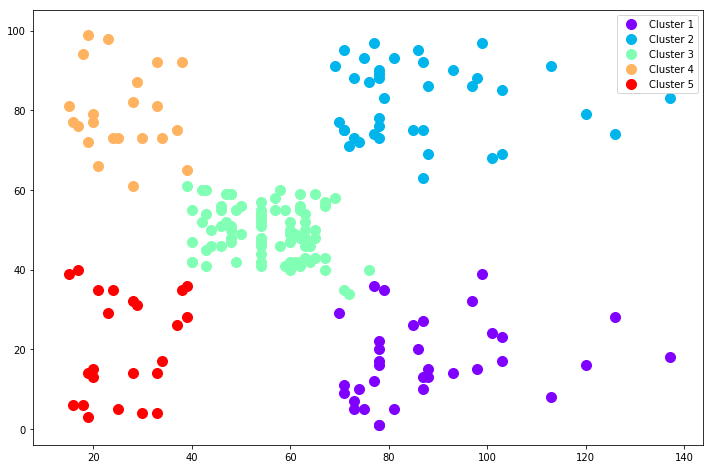

In [7]:
cluster_count = len(np.unique(clusters))
colors = cm.rainbow(np.linspace(0, 1, cluster_count))
plt.figure(figsize = (12, 8))
for i in range(cluster_count):
    plt.scatter(X.iloc[clusters == i, 0], 
                X.iloc[clusters == i, 1], 
                c = colors[i], 
                s = 100, 
                label = 'Cluster ' + str(i+1))
plt.legend()